In [1]:
#import packages
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.svm import SVC
#from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
#from sklearn.linear_model import Lasso
from sklearn import metrics
#from scipy.stats import chi2
#from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

## Import Datasets

In [2]:
BASE_DIR = "/Users/Avinash/Documents/Kanchanah/Springboard/Data_Science_Track/Capstone_Two_Other_Material/"

X_train = "Data/X_train.csv"
X_test = "Data/X_test.csv"
y_train = "Data/y_train.csv"
y_test = "Data/y_test.csv"

In [3]:
X_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_train)),index_col=0)
X_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_test)),index_col=0)
y_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_train)),index_col=0)
y_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_test)),index_col=0)

In [4]:
X_train.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DONT_KNOW,R_RACE_label_MULTIPLE_RESPONSES_SELECTED,R_RACE_label_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME_OTHER_RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.000,0.000000,0.090909,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,...,0,0,0,0,0,1,0,1,0,0
1,0.0,0.250,0.166667,0.090909,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,...,0,0,0,0,0,0,1,1,0,0
2,0.0,0.125,0.083333,0.090909,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,...,0,0,0,0,0,1,0,1,0,0
3,0.0,0.000,0.000000,0.000000,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,...,0,0,0,0,0,1,1,1,0,0
4,0.0,0.125,0.250000,0.090909,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,...,0,0,0,0,0,0,1,0,0,0


In [5]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140394 entries, 0 to 140393
Data columns (total 125 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   CARSHARE                                                       float64
 1   DRVRCNT                                                        float64
 2   HHSIZE                                                         float64
 3   HHVEHCNT                                                       float64
 4   R_AGE                                                          float64
 5   TIMETOWK                                                       float64
 6   VEHAGE                                                         float64
 7   VEHOWNMO                                                       float64
 8   WRKCOUNT                                                       float64
 9   YEARMILE                                       

In [6]:
X_train.shape

(140394, 125)

In [7]:
X_test.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DONT_KNOW,R_RACE_label_MULTIPLE_RESPONSES_SELECTED,R_RACE_label_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME_OTHER_RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.125,0.083333,0.181818,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,...,0,0,0,0,0,1,0,1,0,1
1,0.0,0.125,0.083333,0.181818,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,...,0,0,0,0,0,1,1,0,0,0
2,0.0,0.000,0.250000,0.000000,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.125,0.083333,0.090909,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,...,0,0,0,0,0,1,1,1,1,0
4,0.0,0.125,0.250000,0.090909,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,...,0,0,0,0,0,1,1,1,0,1


In [8]:
X_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60170 entries, 0 to 60169
Data columns (total 125 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   CARSHARE                                                       float64
 1   DRVRCNT                                                        float64
 2   HHSIZE                                                         float64
 3   HHVEHCNT                                                       float64
 4   R_AGE                                                          float64
 5   TIMETOWK                                                       float64
 6   VEHAGE                                                         float64
 7   VEHOWNMO                                                       float64
 8   WRKCOUNT                                                       float64
 9   YEARMILE                                         

In [9]:
X_test.shape

(60170, 125)

In [10]:
X_test.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DONT_KNOW,R_RACE_label_MULTIPLE_RESPONSES_SELECTED,R_RACE_label_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME_OTHER_RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.125,0.083333,0.181818,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,...,0,0,0,0,0,1,0,1,0,1
1,0.0,0.125,0.083333,0.181818,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,...,0,0,0,0,0,1,1,0,0,0
2,0.0,0.000,0.250000,0.000000,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.125,0.083333,0.090909,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,...,0,0,0,0,0,1,1,1,1,0
4,0.0,0.125,0.250000,0.090909,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,...,0,0,0,0,0,1,1,1,0,1


In [11]:
y_train.shape

(140394, 1)

In [12]:
y_train.head()

,fueltype_numeric
165952,0
161420,0
231467,0
109716,0
187414,0


In [13]:
y_test.shape

(60170, 1)

In [14]:
y_test.head()

,fueltype_numeric
205300,0
150902,0
70631,0
53212,0
197639,0


## Model Building

Build a naive model

In [15]:
#Function

n_points=50
probs = np.linspace(0, 1, n_points)

def threshold_and_plot(y_test, target, plot=True):

    def make_thresh():  # try n_points = 50 or 100...
    # calculate each metric here
        precision = [
        metrics.precision_score(y_test, np.where(target > thresh, 1, 0))
        for thresh in probs]
        recall = [metrics.recall_score(y_test, np.where(target > thresh, 1, 0))
              for thresh in probs]
        f1 = [metrics.f1_score(y_test, np.where(target > thresh, 1, 0))
          for thresh in probs]
        return precision, recall, f1

    precision, recall, f1 = make_thresh()
    if plot:
        plt.plot(probs, precision, label='precision')
        plt.plot(probs, recall, label='recall')
        plt.plot(probs, f1, label='f1')
        plt.title("Metrics at various thresholds");
        plt.xlabel("Probability");
        plt.ylabel("Metric value")
        plt.legend();
    # print("Precision: {:.3f}; Recall: {:.3f}; F1: {:.3f}".format(precision, recall, f1))
        return precision, recall, f1
    else:
        return precision, recall, f1


def max_thresh(score_vec):
    max_idx = np.argmax(score_vec)
    max_score = score_vec[max_idx]
    return max_idx, max_score

In [16]:
# set up cross-validator:
# 80/20 train/calibration split in this data (test data still held out)
# 200 iterations
# feel free to use another CV method and explain why
cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

In [17]:
# null model boilerplate
null_reg = LogisticRegression(fit_intercept=False,
                                           max_iter=500,
                                           random_state=632966)

In [18]:
X_train_null = np.ones(shape=y_train.shape[0]).reshape(-1,1) # intercept
X_test_null = np.ones(shape=y_test.shape[0]).reshape(-1,1)

In [19]:
# fit on train and test data (no tuning)
null_train = null_reg.fit(X=X_train_null, y=y_train.values.ravel())
null_test = null_reg.fit(X=X_test_null, y=y_test.values.ravel())

In [20]:
# prob_a (and prob) gives you two columns; second one is the target
#why do we fit with the test here?
train_pred = null_train.predict_proba(X_train_null)
test_pred = null_test.predict_proba(X_test_null)

In [21]:
# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {train_pred[:,1].mean():.3f}")

Observed: 0.030 Fit: 0.029


In [22]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {"model__C": (np.logspace(start=-4, stop=4, num=20))}

In [23]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[("model", null_reg)])

In [24]:
# set up grid search
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [25]:
# fit model
null_model = model_grid.fit(X_train_null, y_train.values.ravel())

In [26]:
# model predictions
null_train_pred = null_model.predict_proba(X_train_null)
null_test_pred = null_model.predict_proba(X_test_null)

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {null_train_pred[:,1].mean():.3f}")

Observed: 0.030 Fit: 0.152


### Logistic Regression

In [27]:

# null model boilerplate
log_reg = LogisticRegression(fit_intercept=True,
                                           random_state=632966, class_weight='balanced')

In [32]:
#30 values of C to search over (can use fewer to speed things up);
#would need to amend to use L2 or elastic net
model_params = {"model__C": (np.logspace(start=-4, stop=4, num=10))}

In [33]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[("model", log_reg)])

In [35]:
# set up grid search
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [36]:
# fit model
log_model = model_grid.fit(X_train, y_train.values.ravel())

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [38]:
# model predictions
log_train_pred = log_model.predict_proba(X_train)
log_test_pred = log_model.predict_proba(X_test)

In [39]:

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(log_train_pred[:,1]):.3f}")

Observed: 0.030 Fit: 0.405


/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


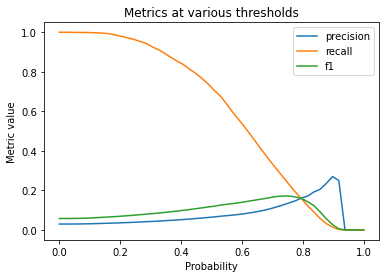

In [40]:
test_metric = threshold_and_plot(y_test=y_train, target=log_train_pred[:,1])

In [41]:
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric):
    max_idx, max_val = max_thresh(val)
    print(f"Maximum {metric}:{max_val:.3f} and id:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.270 and id:0.8979591836734693
Maximum Recall:1.000 and id:0.0
Maximum F1:0.172 and id:0.7551020408163265


In [42]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(log_test_pred[:,1] > 0.735, 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(log_test_pred[:,1] > 0.735, 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(log_test_pred[:,1] > 0.735, 1, 0))))

Precision on Test: 0.12643080124869926
Recall on Test: 0.27914991384261917
F1 score on Test: 0.17403760071620408


## Poisson Regression

In [43]:
from sklearn import linear_model
pos_reg = linear_model.PoissonRegressor()

In [44]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {"model__alpha": (np.linspace(0.0,1,20))}

In [45]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[('model', pos_reg)])

In [46]:
# set up grid search
model_grid_pos = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [47]:
# fit model
pos_model = model_grid_pos.fit(X_train, y_train.values.ravel())

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  category=UserWarning,


In [48]:
# model predictions
pos_train_pred = pos_model.predict(X_train)
pos_test_pred = pos_model.predict(X_test)

In [49]:

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(pos_train_pred):.3f}")

Observed: 0.030 Fit: 0.030


/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_cl

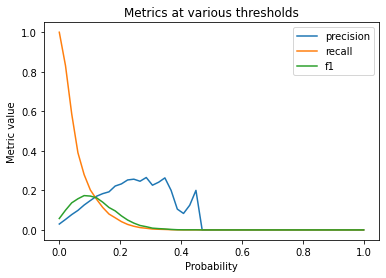

In [50]:
test_metric_pos = threshold_and_plot(y_test=y_train, target=pos_train_pred)

In [51]:
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric_pos):
    max_idx, max_val = max_thresh(val)
    print(f"Maximum {metric}:{max_val:.3f} and id:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.265 and id:0.2857142857142857
Maximum Recall:1.000 and id:0.0
Maximum F1:0.174 and id:0.08163265306122448


In [52]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(pos_test_pred > 0.0816, 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(pos_test_pred > 0.0816, 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(pos_test_pred > 0.0816, 1, 0))))

Precision on Test: 0.12422205626089121
Recall on Test: 0.2866168868466399
F1 score on Test: 0.17332407085793677


### Random Forest

In [53]:
rfc = RandomForestClassifier(random_state = 42)

In [54]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {'model__n_estimators': [100, 200],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth' : [4, 5, 6],
    'model__criterion' :['gini']}

In [55]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[('model', rfc)])

In [57]:
# set up grid search
model_grid_rfc = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [59]:
# fit model
rfc_model = model_grid_rfc.fit(X_train, y_train.values.ravel())

In [60]:
# model predictions
rfc_train_pred = rfc_model.predict_proba(X_train)
rfc_test_pred = rfc_model.predict_proba(X_test)

In [61]:

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(rfc_train_pred[:,1]):.3f}")

Observed: 0.030 Fit: 0.030


/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_cl

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_cl

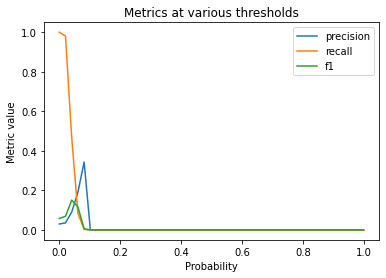

In [62]:
test_metric_rfc = threshold_and_plot(y_test=y_train, target=rfc_train_pred[:,1])

In [63]:
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric_rfc):
    max_idx, max_val = max_thresh(val)
    print(f"Maximum {metric}:{max_val:.3f} and threshold:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.344 and threshold:0.08163265306122448
Maximum Recall:1.000 and threshold:0.0
Maximum F1:0.151 and threshold:0.04081632653061224


In [64]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(pos_test_pred >0.0408, 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(pos_test_pred > 0.0408, 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(pos_test_pred > 0.0408, 1, 0))))

Precision on Test: 0.07436370343046846
Recall on Test: 0.5789775990809879
F1 score on Test: 0.1317991631799163
